In [55]:
import pandas as pd
from pathlib import Path

import scienceplots

plt.style.use(['science', 'nature'])

In [56]:

data_path = Path("/Users/fuchur/Documents/22/git_sync/gnn-tracking-experiments/data/vis_230201")

In [57]:
dfs = []
for f in data_path.glob("*.csv"):
    dfs.append(pd.read_csv(f))

In [74]:
dfs[1]

,Name,_wandb,trk.double_majority_pt0.5,trk.double_majority_pt0.9,trk.double_majority,trk.double_majority_pt1.5
0,PretrainedECTrainable_af5b5461,NaN,0.469385,0.771792,0.209944,0.735751


In [59]:
def get_keys_values(df):
    dct = df.to_dict()
    dct = {key: value[0] for key, value in dct.items() if not key in ["Name", "_wandb"]}
    keys = sorted(dct.keys())
    return keys, [dct[k] for k in keys]

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [107]:
def plot_from_df(df, title, xlabel):
    fig, ax = plt.subplots(dpi=250)
    keys, values = get_keys_values(df)
    keys = list(reversed([r"$p_T\geq 1.5$ GeV", r"$p_T\geq 0.9$ GeV", r"$p_T\geq 0.5$ GeV", r"$p_T\geq 0$ GeV"]))
    y_pos = np.arange(len(keys))

    for y, v in zip(y_pos, values):
        plt.text(v/2, y, str(round(100*v, 1))+"\%", color='white', ha="center", va="center", weight="bold", fontsize=9)


    ax.barh(y_pos, values, align='center', color="#e77500")
    ax.set_yticks(y_pos, labels=keys)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

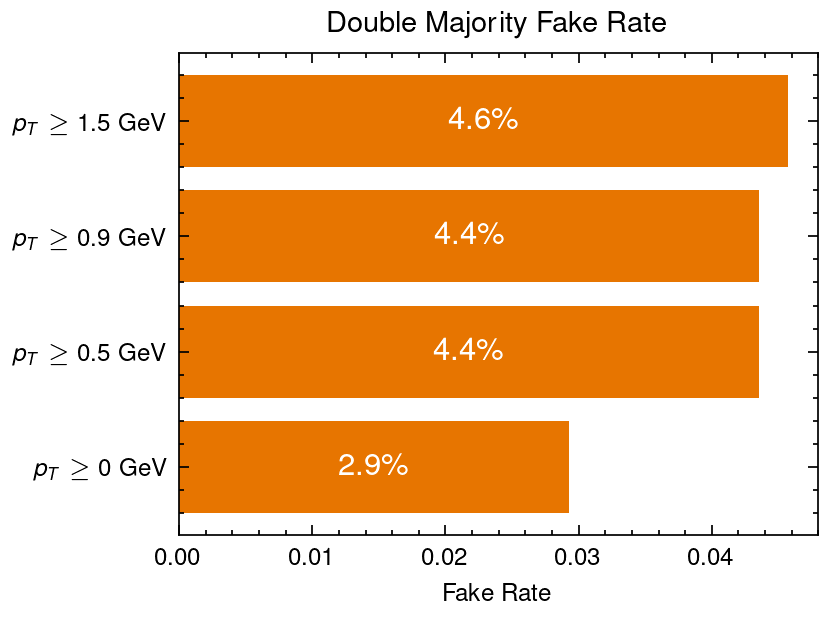

In [108]:
plot_from_df(dfs[3], "Double Majority Fake Rate", "Fake Rate")

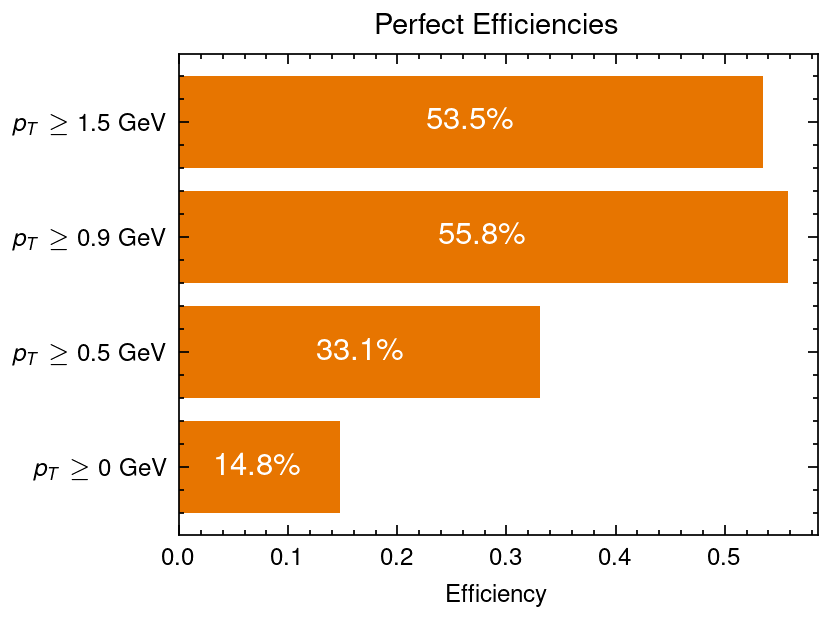

In [109]:
plot_from_df(dfs[2], "Perfect Efficiencies", "Efficiency")

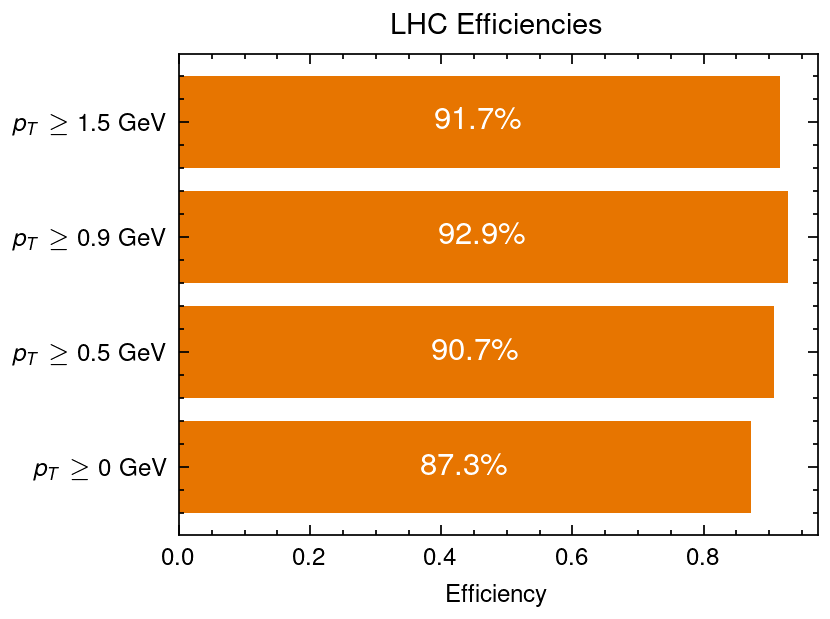

In [110]:
plot_from_df(dfs[0], "LHC Efficiencies", "Efficiency")

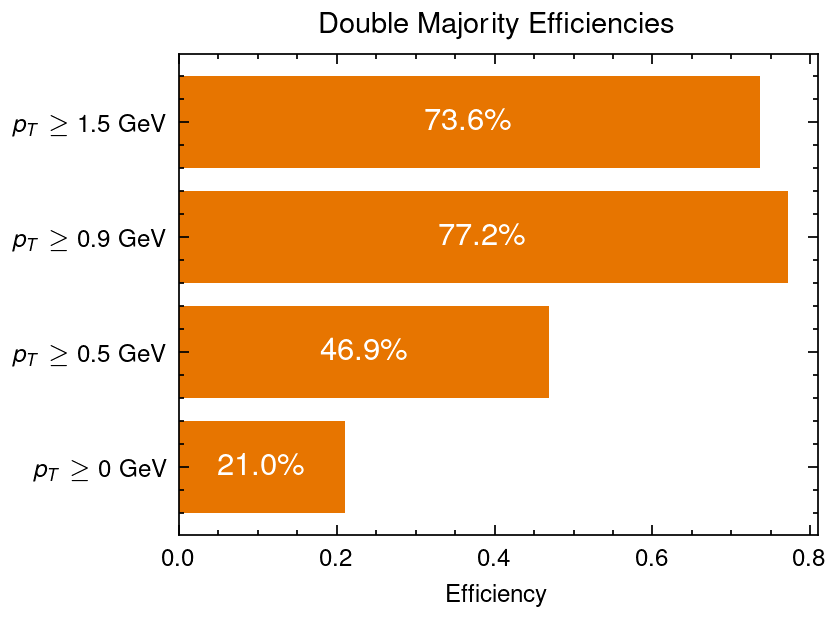

In [111]:
plot_from_df(dfs[1], "Double Majority Efficiencies", "Efficiency")